<a href="https://colab.research.google.com/github/Shesh6/CS154--Contemporary-Applied-Mathematics/blob/master/CS154_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CS154 Final Project: Contemporary Applied Mathematics
_Elisa Heinrich Mora and Yoav Rabinovich, December 2019_

-------------------------------------------------------

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.sparse
%matplotlib inline

#### Problem 1: Fractals

In [0]:
# Newton's Method
def Newton(f,fp,x,e,iters,alpha=1,c=0):
    """
    Iteratively find solution to f with initial condition x.

    Arguments:
    - f: The function to solve.
    - fp: The derivative of f with respect to x.
    - x: Intial condition.
    - epsilon, iters: Stopping condition for Newton's method.
    - alpha, c: Generalizing Newton's method with multiplicative and constant factors.
    """
    
    for n in range(0,iters):
        f_eval = f(x)
        fp_eval = fp(x)
        if fp_eval == 0:
            #print('fp_eval = 0')
            return (None,None)
        if abs(f_eval) < e:
            return x,n
        x = x - alpha*f_eval/fp_eval + c
    #print('Solution not found')
    return (None,None)

In [0]:
# Mandelbrot Set
def Mandelbrot(z,iters):
    """
    Find if iterating z^2+c converges within limit.

    Arguments:
    - z: Intial condition.
    - iters: Stopping condition.
    """
    z0=z
    for n in range(0,iters):
        if abs(z) > 2:
            return z,n
        z = z*z + z0
    #print('Solution not found')
    return (None,None)

In [0]:
def plot_solutions(f,fp,epsilon,iters,ranges,decimals,alpha=1,c=0, \
                   cmap="Set1",plot_solutions=True, coloring_scheme=0,
                   mandelbrot = False):
    """
    Color the complex plane by solutions to f at each initial point.
    
    Arguments:
    - f: The function to solve.
    - fp: The derivative of f with respect to x.
    - epsilon, iters: Stopping condition for Newton's method.
    - ranges: Initial conditions to solve.
    - decimals: Rounding for identifying unique solutions.
    - alpha, c: Generalizing Newton's method with multiplicative and constant factors.
    - cmap: Allows for alternate coloring.
    - plot_solution: Toggles the plotting of solutions, useful when solutions
                     lie outside of the plotted range.
    - coloring_scheme: 0 for basin coloring, 1 for step-count coloring.
    - mandelbrot: Alternatively run the Mandelbrot algorithm.
    """ 

    solutions = []
    steps = []
    init_conds = []
    # Handle symmetric ranges
    if not isinstance(ranges,list):
        ranges = [ranges, ranges]
    # Scan through range of initial conditions and solve
    for a in ranges[0]:
        for b in ranges[1]:
            x = complex(a,b)
            if mandelbrot:
                solution,step = Mandelbrot(x,iters)
            else:
                solution,step = Newton(f,fp,x,epsilon,iters,alpha,c)
            # Skip points where Newton's method doesn't converge in time
            if solution:
                # Round solutions
                solution = np.around(solution,decimals=decimals);
                solutions.append(solution)
                init_conds.append(x)
                steps.append(step)

    # Basin coloring scheme
    if coloring_scheme == 0:
        grouping = solutions
    # Steps coloring scheme        
    elif coloring_scheme ==1:
        grouping = steps

    # Identify unique solutions
    uniques = np.unique(grouping)
    numericals = []
    for unique in uniques:
        # Filter initial conditions by solution
        indices = np.where(np.array(grouping) == unique)[0]
        numerical = np.array(init_conds)[indices]
        numericals.append(numerical)

    # Plot
    plt.figure(figsize=(9,9))
    plt.title("Solutions")
    plt.xlabel("Real part")
    plt.ylabel("Imaginary part")
    cmap = plt.get_cmap(cmap)
    cycle = cmap.N
    # Color graph
    for i,unique in enumerate(uniques):
        plt.scatter(numericals[i].real,numericals[i].imag,c=[cmap(i%cycle)],label="x = "+str(unique),s=1)
    if plot_solutions:
    # Plot solution on top
        for i,unique in enumerate(uniques):
            plt.scatter(unique.real,unique.imag,c=[cmap(i%cycle)],edgecolor="black",label=None)
        plt.legend()
    plt.show()

In [0]:
# Target functions and derivatives
def f1(x):
    return x**2+1

def fp1(x):
    return 2*x

def f2(x):
    return x**3-1

def fp2(x):
    return 3*x**2

def f3(x):
    return x**5-1

def fp3(x):
    return 5*x**4

In [0]:
ranges = np.linspace(-1,1,500)
epsilon = 1e-5
iters = 500
decimals = 4

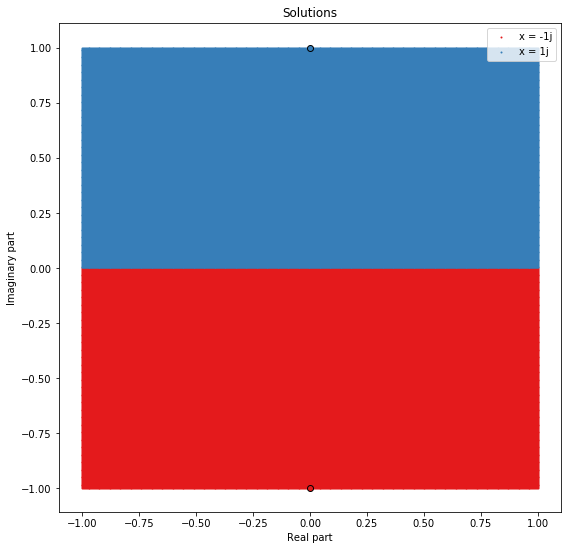

In [0]:
plot_solutions(f1,fp1,epsilon,iters,ranges,decimals)

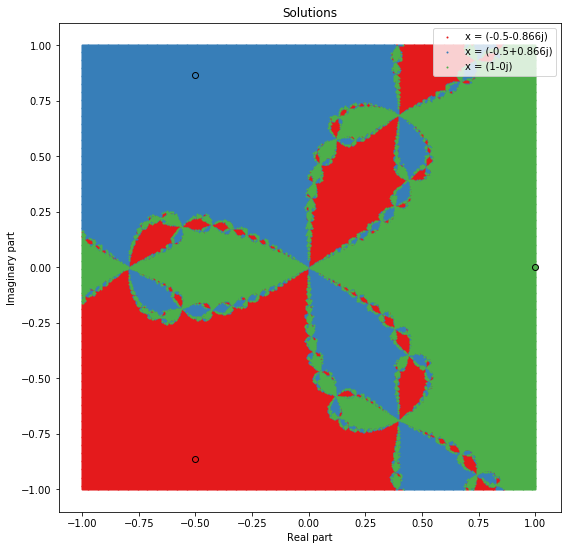

In [0]:
plot_solutions(f2,fp2,epsilon,iters,ranges,decimals)

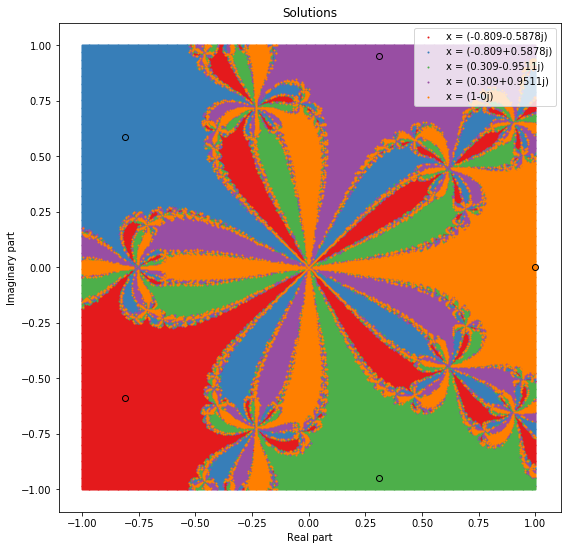

In [0]:
plot_solutions(f3,fp3,epsilon,iters,ranges,decimals)

#### Extra Fun Fractals!

In this case, there are many solutions, but an interesting region is formed for initial conditions without any solutions. The multitude of solution also forces us to cycle the 10 colors available in the colormap, presenting interesting patterns relating to the order in which we find solutions as we scan the space.

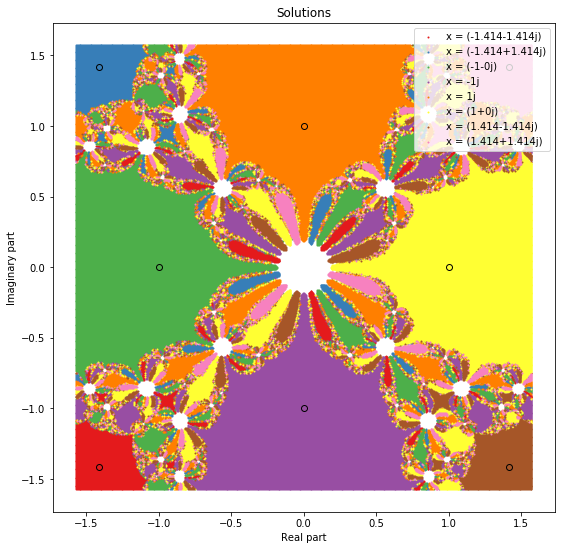

In [0]:
def f4(x): return x**8+15*x**4-16;
def fp4(x): return 8*x**7+60*x**3;

plot_solutions(f4,fp4,1e-2,30,np.linspace(-np.pi/2,np.pi/2,500),3)

The Generalized Newton's Method allows for multiplicative and constant factors in the update equation. We begin with some multiplicative factors, called "relaxation factors" as they were originally developed to help Newton's Method converge faster. In our case, they cause magnification-like effects.

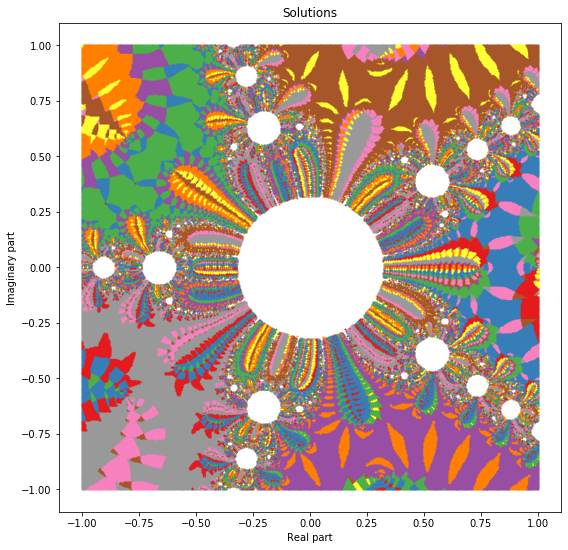

In [0]:
plot_solutions(f3,fp3,1e-2,30,np.linspace(-1,1,500),3,alpha=0.5,plot_solutions=False)

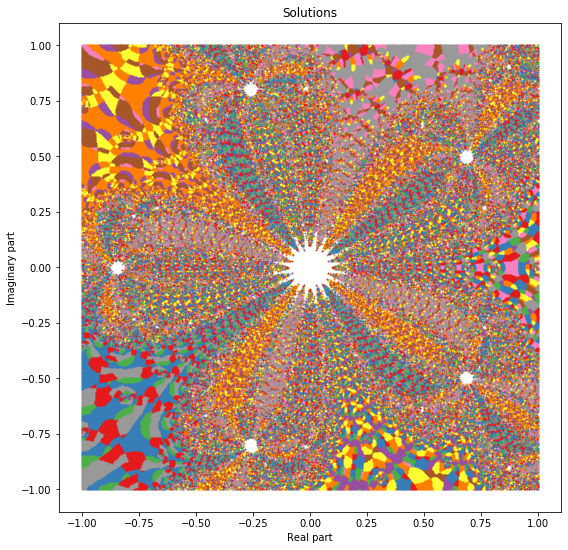

In [0]:
plot_solutions(f3,fp3,1e-2,30,np.linspace(-1,1,500),3,alpha=1.5,plot_solutions=False)

A complex multiplicative factor introduces amazing curved structured throughout the fractal!

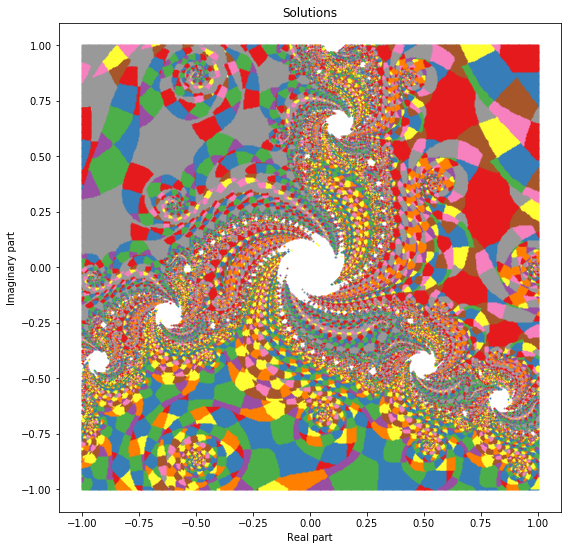

In [0]:
plot_solutions(f2,fp2,1e-2,30,np.linspace(-1,1,500),3,alpha=0.5+0.5j,plot_solutions=False)

Now, adding a constant factor, even a minute one, can shift the behavior of the fractal greatly. Larger values seem to be really hard for Newton's Method, and lead to faliure to converge in time throughout the space. This extension is called the "Nova Fractal".

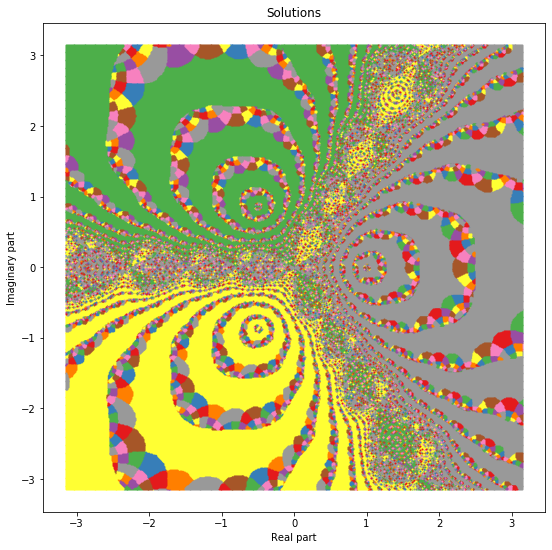

In [0]:
plot_solutions(f2,fp2,1e-2,30,np.linspace(-np.pi,np.pi,500),3,c=0.001,plot_solutions=False)

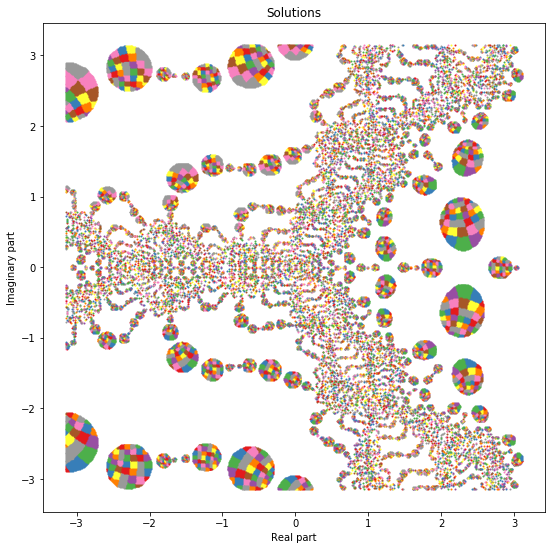

In [0]:
plot_solutions(f2,fp2,1e-2,30,np.linspace(-np.pi,np.pi,500),3,c=0.01,alpha=1.5,plot_solutions=False)

Imaginary constant factors introduce factors that are difficult to qualitatively describe.

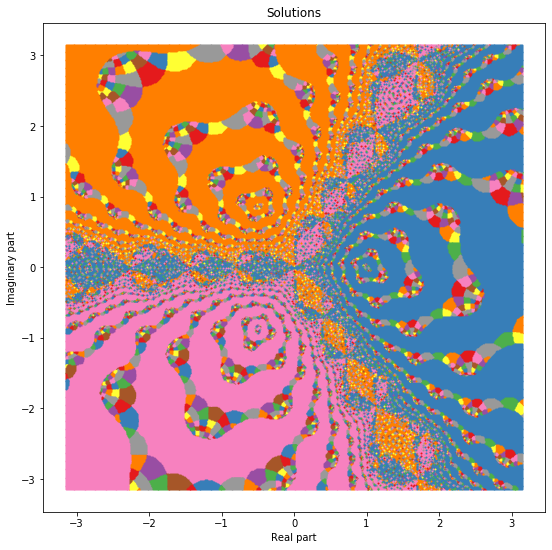

In [0]:
plot_solutions(f2,fp2,1e-2,30,np.linspace(-np.pi,np.pi,500),3,c=0.001+0.002j,plot_solutions=False)

I don't know anymore

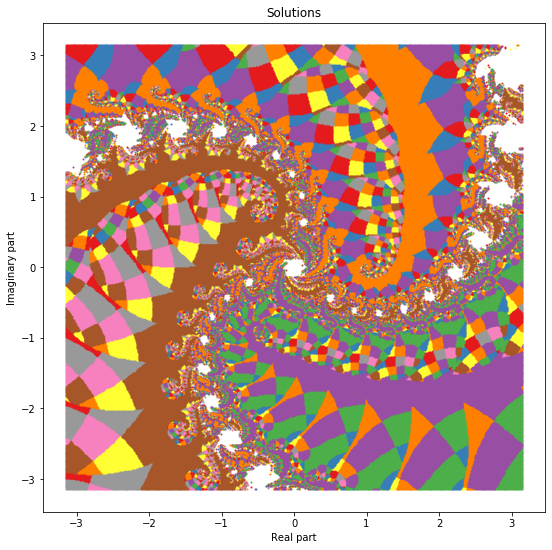

In [0]:
plot_solutions(f2,fp2,1e-2,30,np.linspace(-np.pi,np.pi,500),3,c=0.001+0.002j,alpha = 0.5+0.5j,plot_solutions=False)

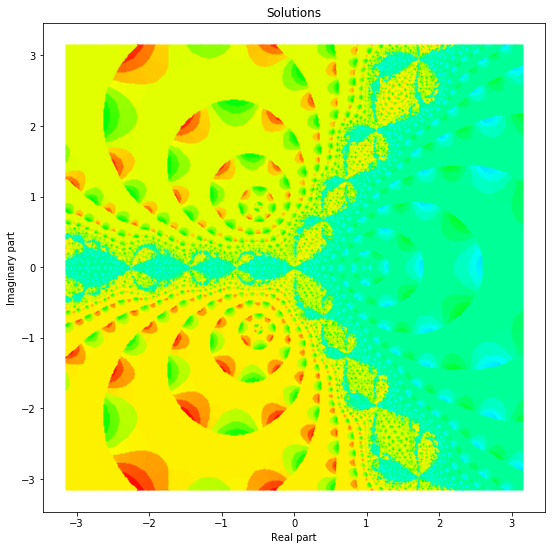

In [0]:
plot_solutions(f2,fp2,1e-2,30,np.linspace(-np.pi,np.pi,500),3,plot_solutions=False,cmap="hsv")

Trigonometric functions take much longer to evaluate but yield beautiful, circular results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in cos
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sin
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in cdouble_scalars


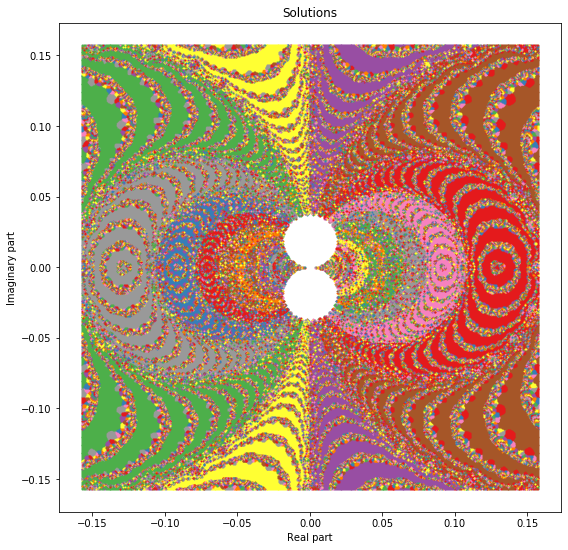

In [22]:
def f5(x): return np.cos(x);
def fp5(x): return -np.sin(x);

plot_solutions(f5,fp5,1e-2,30,np.linspace(-np.pi/20,np.pi/20,500),3,plot_solutions=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in cosh
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in cdouble_scalars


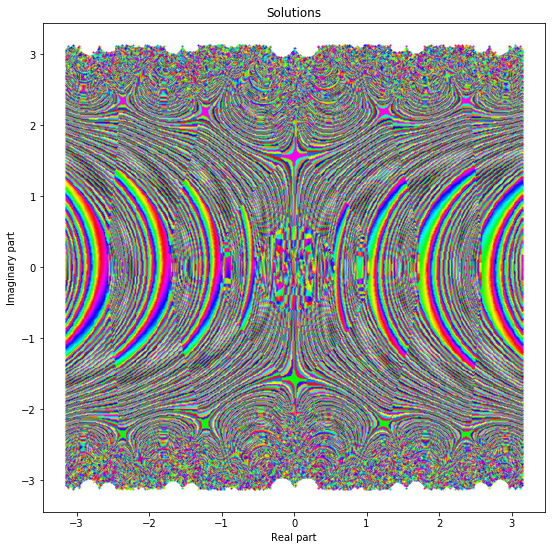

In [209]:
def f6(x): return np.cosh(x)-1
def fp6(x): return np.sinh(x)

plot_solutions(f6,fp6,1e-2,10,np.linspace(-np.pi,np.pi,500),3,plot_solutions=False,cmap="hsv")

Introducing a new color scheme that depends on iterations taken to reach solution rather then the solution reached can drastically change the appearace. For some cases we suddenly have smooth coloring and for others we get patchwork again.

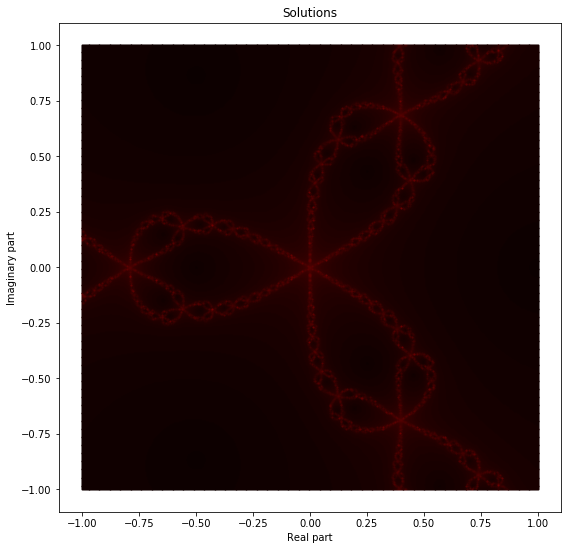

In [0]:
plot_solutions(f2,fp2,epsilon,iters,ranges,decimals,coloring_scheme=1,plot_solutions=False,cmap="hot")

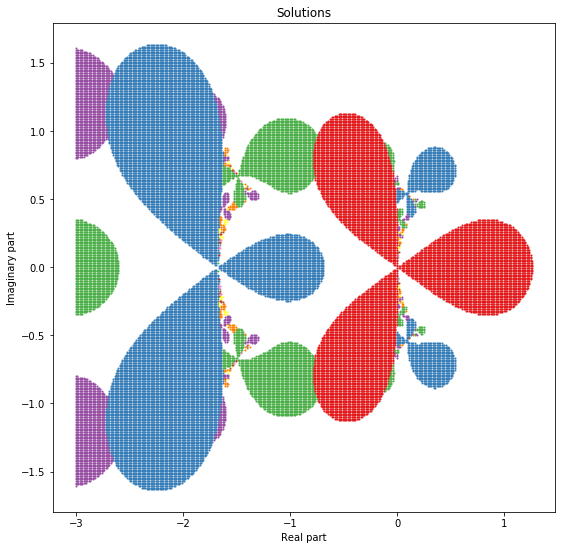

In [212]:
plot_solutions(f2,fp2,1,2500,np.linspace(-3,3,500),5,c=1,plot_solutions=False,coloring_scheme=1,cmap="Set1")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in cos
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sin
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in cdouble_scalars


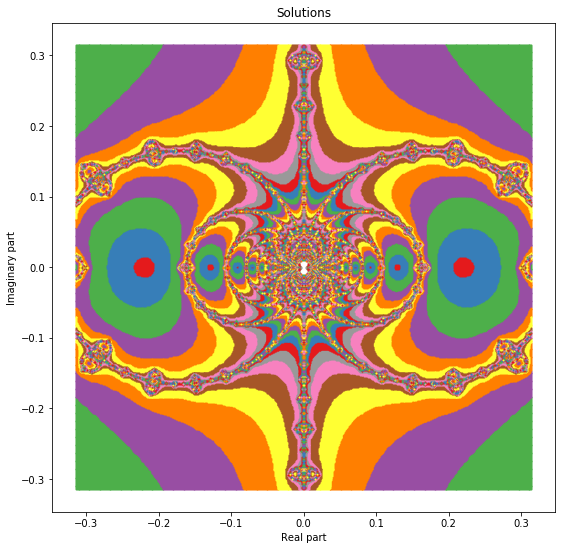

In [26]:
plot_solutions(f5,fp5,1e-2,100,np.linspace(-np.pi/10,np.pi/10,500),3,plot_solutions=False,coloring_scheme=1,cmap="Set1")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in cos
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sin
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in cdouble_scalars


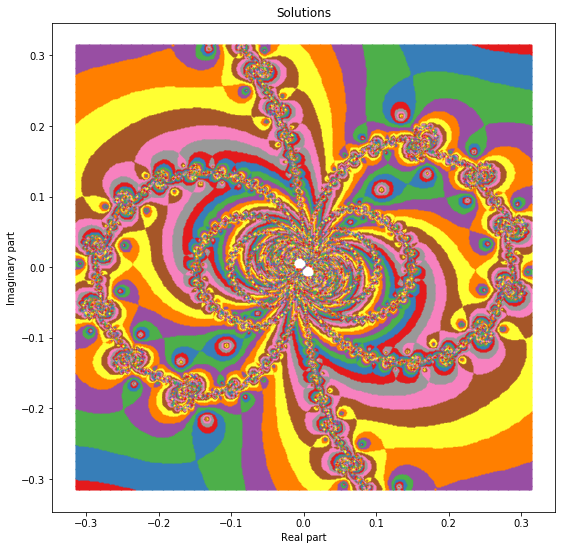

In [32]:
plot_solutions(f5,fp5,1e-2,100,np.linspace(-np.pi/10,np.pi/10,500),3,alpha=0.5+0.5j,plot_solutions=False,coloring_scheme=1)

The Mandelbrot Set is produced by iterating not the initial condition, but the possible values of the additive constant factor c in the update scheme $z_{i+1} = z_i^2+c.$

The region of the complex plane of constants where the series doesn't converge produces the famous fractal. Zoomed in, the pattern repeats on different scales.

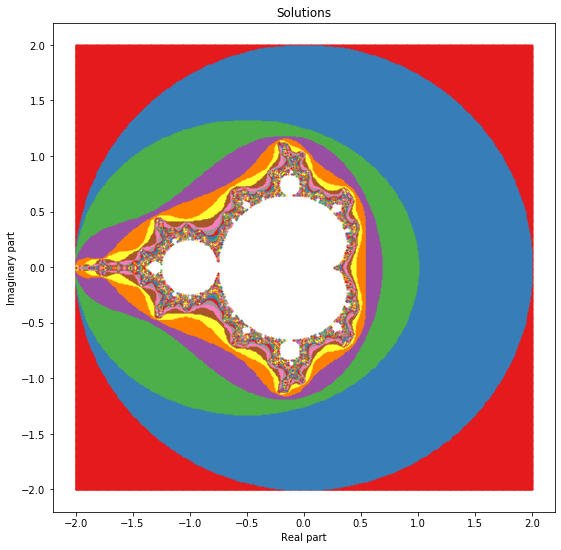

In [57]:
plot_solutions(_,_,1e-2,256,np.linspace(-2,2,500),decimals,coloring_scheme=1,mandelbrot=True,plot_solutions=False,cmap="Set1")

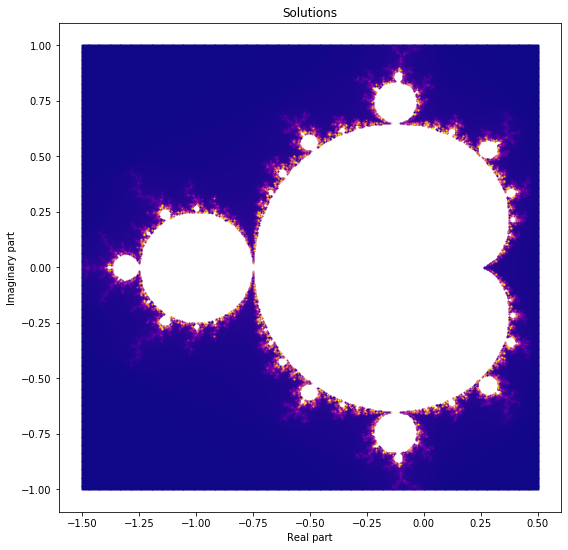

In [58]:
plot_solutions(_,_,1e-2,2000,[np.linspace(-1.5,0.5,500),np.linspace(-1,1,500)],decimals,coloring_scheme=1,mandelbrot=True,plot_solutions=False,cmap="plasma")

#### Problem 2: Strange Attractor

In [0]:
# Runge-Kutta 4 in 3 dimensions, taken from:
# https://www.codeproject.com/Tips/792927/Fourth-Order-Runge-Kutta-Method-in-Python'

def rK3(a, b, c, fa, fb, fc, hs):
    a1 = fa(a, b, c)*hs
    b1 = fb(a, b, c)*hs
    c1 = fc(a, b, c)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(ak, bk, ck)*hs
    b2 = fb(ak, bk, ck)*hs
    c2 = fc(ak, bk, ck)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(ak, bk, ck)*hs
    b3 = fb(ak, bk, ck)*hs
    c3 = fc(ak, bk, ck)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(ak, bk, ck)*hs
    b4 = fb(ak, bk, ck)*hs
    c4 = fc(ak, bk, ck)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return [a, b, c]

In [0]:
# Run RK4
def Solver(y0s,fs,k,iters):
    overtime = [y0s]
    for i in range(iters):
        y0s = rK3(*y0s, *fs, k)
        overtime.append(y0s)
    return y0s,overtime

In [0]:
# Target functions
def fx(x,y,z):
    global sigma
    return sigma*(y-x)

def fy(x,y,z):
    global r
    return r*x-y-x*z

def fz(x,y,z):
    global b
    return x*y-b*z

In [0]:
# Define variables
sigma = 10
b = 8/3
r_range = np.linspace(20.1,30,100)
fs = [fx,fy,fz]
y0s = [0,1,0]
k = 1e-2
iters = 1000

In [0]:
# Run
overr = []
overts = []
for r in r_range:
    solution, overt = Solver(y0s,fs,k,iters)
    overr.append(solution)
    overts.append(overt)
overrs = np.array(overr)
overts = np.array(overts)

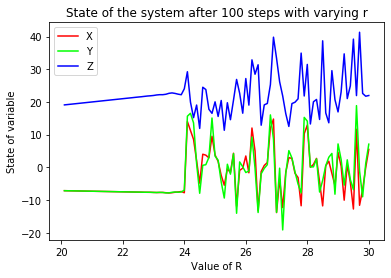

In [0]:
# Examine results
plt.title("State of the system after "+str(int(k*iters))+" steps with varying r")
plt.xlabel("Value of R")
plt.ylabel("State of variable")
plt.plot(r_range,overrs[:,0],c="red",label="X")
plt.plot(r_range,overrs[:,1],c="lime",label="Y")
plt.plot(r_range,overrs[:,2],c="blue",label="Z")
plt.legend()
plt.show()

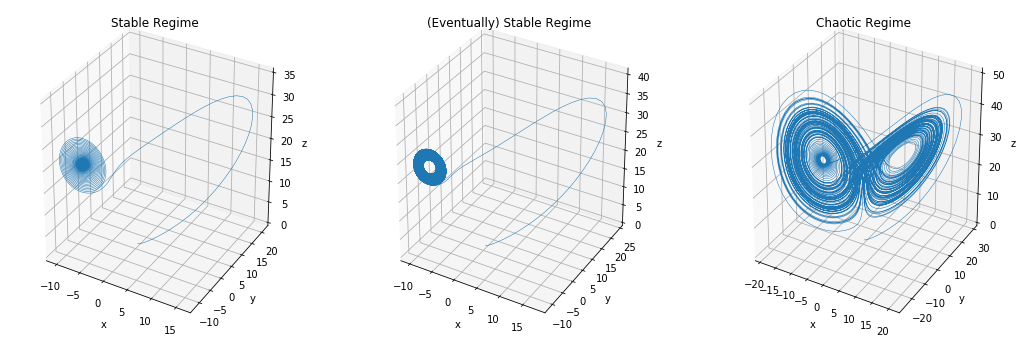

In [0]:
# Plot 3D
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 3, 1, projection='3d', title="Stable Regime")
ax.set_xlabel("x",)
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot3D(overts[10,:,0],overts[10,:,1],overts[10,:,2], linewidth=0.5)

ax2 = fig.add_subplot(1, 3, 2, projection='3d', title="(Eventually) Stable Regime")
ax2.plot3D(overts[39,:,0],overts[39,:,1],overts[39,:,2], linewidth=0.5)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

ax3 = fig.add_subplot(1, 3, 3, projection='3d', title="Chaotic Regime")
ax3.plot3D(overts[90,:,0],overts[90,:,1],overts[90,:,2], linewidth=0.5)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")

plt.show()

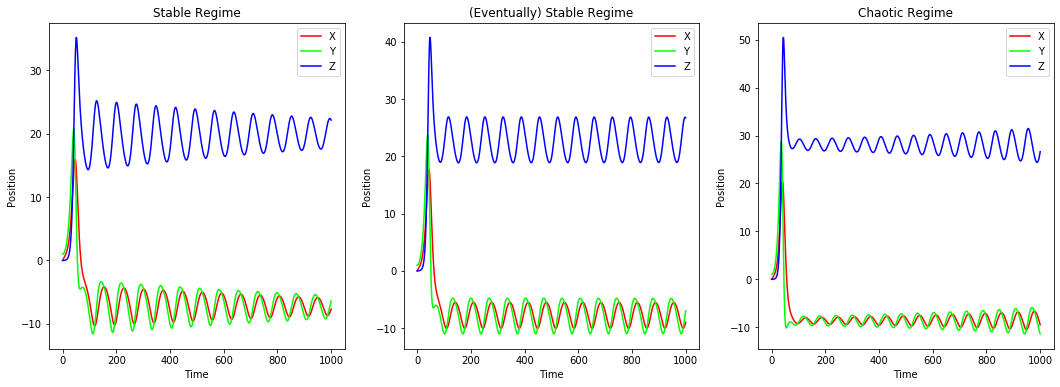

In [0]:
# Plot 2D
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 3, 1, title="Stable Regime")
ax.set_xlabel("Time")
ax.set_ylabel("Position")
ax.plot(overts[10,:,0],c="red",label="X")
ax.plot(overts[10,:,1],c="lime",label="Y")
ax.plot(overts[10,:,2],c="blue",label="Z")
ax.legend()

ax2 = fig.add_subplot(1, 3, 2, title="(Eventually) Stable Regime")
ax2.set_xlabel("Time")
ax2.set_ylabel("Position")
ax2.plot(overts[39,:,0],c="red",label="X")
ax2.plot(overts[39,:,1],c="lime",label="Y")
ax2.plot(overts[39,:,2],c="blue",label="Z")
ax2.legend()

ax3 = fig.add_subplot(1, 3, 3, title="Chaotic Regime")
ax3.set_xlabel("Time")
ax3.set_ylabel("Position")
ax3.plot(overts[90,:,0],c="red",label="X")
ax3.plot(overts[90,:,1],c="lime",label="Y")
ax3.plot(overts[90,:,2],c="blue",label="Z")
ax3.legend()

plt.show()

In [0]:
# Define Variables
r = 28
y0s1 = [0,1.0000001,0]

# Run
_, overt2 = Solver(y0s1,fs,k,iters)
overt2 = np.array(overt2)

# Find correct r value in old data
index = np.argwhere(r_range==28)[0][0]

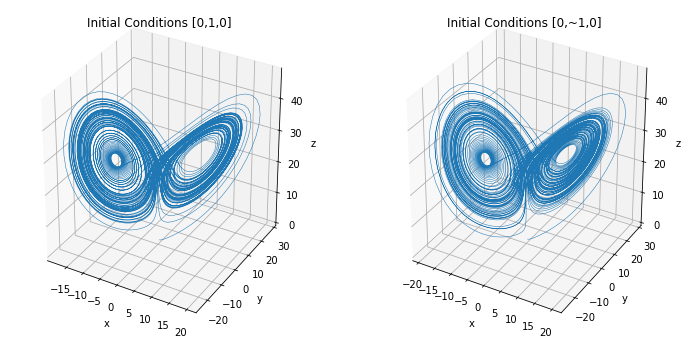

In [0]:
# Plot 3D
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1, projection='3d', title="Initial Conditions [0,1,0]")
ax.plot3D(overts[index,:,0],overts[index,:,1],overts[index,:,2], linewidth=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax2 = fig.add_subplot(1, 2, 2, projection='3d', title="Initial Conditions [0,~1,0]")
ax2.plot3D(overt2[:,0],overt2[:,1],overt2[:,2], linewidth=0.5)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")


plt.show()

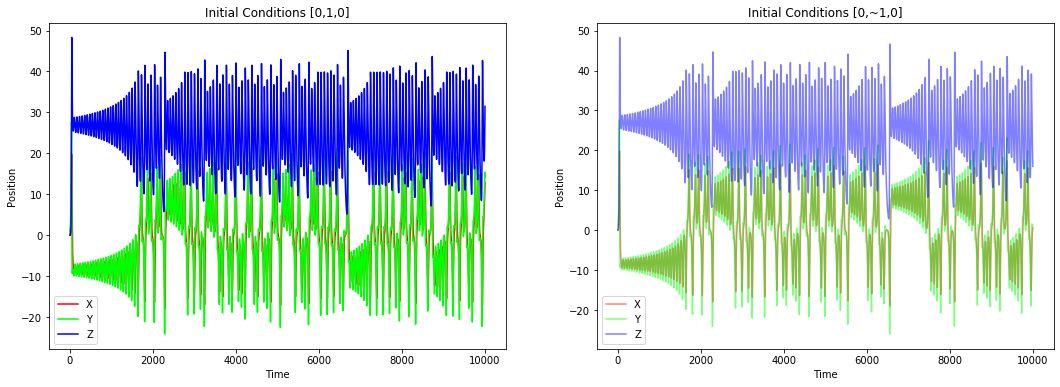

In [0]:
# Plot 2D
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 2, 1, title="Initial Conditions [0,1,0]")
ax.set_xlabel("Time")
ax.set_ylabel("Position")
ax.plot(overts[index,:,0],c="red",label="X")
ax.plot(overts[index,:,1],c="lime",label="Y")
ax.plot(overts[index,:,2],c="blue",label="Z")
ax.legend()

ax2 = fig.add_subplot(1, 2, 2, title="Initial Conditions [0,~1,0]")
ax2.set_xlabel("Time")
ax2.set_ylabel("Position")
ax2.plot(overt2[:,0],c="red",label="X",alpha=0.5)
ax2.plot(overt2[:,1],c="lime",label="Y",alpha=0.5)
ax2.plot(overt2[:,2],c="blue",label="Z",alpha=0.5)
ax2.legend()
plt.show()

#### Problem 3: Laplace Equation Solver

In [0]:
def Laplasolve(b_conds,ranges):

    """
    Solves the Laplace equation for an arbitrary grid of equally spaced points
    and plots the solution.

    Arguments:
    - b_conds: List of four functions defining boundary conditions: [N,S,W,E].
    - ranges: List of two lists of evenly spaces points: [X_range, Y_range].
    """
    
    # Define Ns and deltas
    Nx = len(ranges[0])
    dx = ranges[0][1]-ranges[0][0]
    Ny = len(ranges[1])
    dy = ranges[1][1]-ranges[1][0]
    Ns = [Nx,Nx,Ny,Ny]
    ds = [dx,dx,dy,dy]
    size = (Nx-2)*(Ny-2)

    # Make M out of diagonal values and offsets
    diag_offs = [0,1,-1,Nx-2,-Nx+2]
    diag_vals = [-4,1,1,1,1]
    M = scipy.sparse.diags(diag_vals,diag_offs,shape=(size,size)).toarray()

    # Evaluate boundary conditions at the points designated by ranges
    evals = [[b_conds[i](j*ds[i]) for j in range(Ns[i])] for i in range(4)]

    # Construct target vector and remove interaction terms at line cutoffs
    b = []
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            num = 0
            if i == 1:
                num -= evals[2][j]
            if i == Nx-2:
                num -= evals[3][j]
                M[(i-1)*(Nx-2),(i-1)*(Nx-2)-1] = 0
                M[(i-1)*(Nx-2)-1,(i-1)*(Nx-2)] = 0
            if j == 1:
                num -= evals[1][i]
            if j == Ny-2:
                num -= evals[0][i]
            b.append(num)
            #print("("+str(i)+","+str(j)+") "+str(num))
    
    # Solve system
    solved = np.linalg.solve(M,b)
    #print(M)
    #print(b)
    #print(evals)
    #print(solved)

    # Plot
    X, Y = np.meshgrid(ranges[0], ranges[1])
    Z = np.zeros((X.shape))
    solved = np.flip(solved).reshape((X.shape[0]-2,X.shape[1]-2)).T
    #print(solved)
    for (i,j),_ in np.ndenumerate(Z):
        num = 0
        if i == 0:
            num = evals[1][j]
        elif i == Z.shape[0]-1:
            num = evals[0][j]
        elif j == 0:
            num = evals[3][i]
        elif j == Z.shape[1]-1:
            num = evals[2][i]
        else:
            num = solved[i-2,j-2]
        Z[i,j] = num
    
    #print(Z)
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(121,projection='3d')
    ax.plot_surface(X,Y,Z)
    ax.plot_wireframe(X,Y,Z,color="white")
    ax2 = fig.add_subplot(122)
    ax2.contourf(X,Y,Z,)
    plt.show()

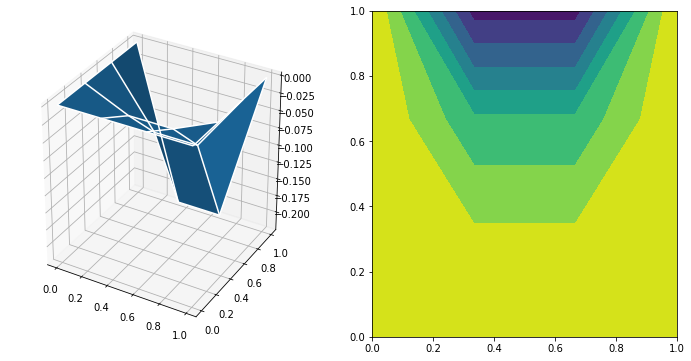

In [196]:
def f1(x): return (x**2)-x
def f0(x): return 0

b_conds = [f1,f0,f0,f0]
N = 4
M = 4
ranges = [np.linspace(0,1,N),np.linspace(0,1,M)]
Laplasolve(b_conds, ranges)